Problem 1:

There are various stocks for which we have collected a data set,
which all stocks are apparently similar in performance

Problem 2:

How many Unique patterns that exist in the historical stock data set,
based on fluctuations in price.

Problem 3:

Identify which all stocks are moving together and which all stocks
are different from each other.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 36.2 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=a1c1c9b68cf1b9212fed3ad29b8d7cbe8c9d92dcfd68a18adfec36d739298bdd
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [3]:
#import lib
import factor_analyzer
from factor_analyzer import FactorAnalyzer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML_Assignments/data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [5]:
df.shape

(41266, 502)

In [6]:
df.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [7]:
df.isnull().sum().unique() #there is no null values in the data.

array([0])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [9]:
df = df.drop(['DATE','SP500'], axis=1)

Problem 1:

There are various stocks for which we have collected a data set,
which all stocks are apparently similar in performance

In [10]:
corr = df.corr()
corr.values
cor_dt = pd.DataFrame(data=corr.values, columns=corr.index, index = corr.index)
cor_dt.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,...,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,...,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,...,0.321414,-0.438662,0.443773,0.347293,-0.463670,0.589464,0.634191,0.418591,-0.201805,0.160213


In [11]:
cor_dt[cor_dt['NASDAQ.AAL'].values > 0.80][:5]

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AMZN,0.803319,0.370111,0.730719,0.386619,0.252712,0.828757,-0.648854,0.059345,0.897693,0.170978,...,0.879967,-0.733852,0.530139,0.804398,-0.203979,0.533584,0.503878,0.793529,0.419472,0.872246
NASDAQ.EXPE,0.812206,0.379622,0.818384,0.218189,0.369697,0.834440,-0.707045,0.296553,0.817588,0.199334,...,0.931258,-0.825230,0.591514,0.859042,-0.368192,0.712184,0.658203,0.883902,0.347660,0.913009
NASDAQ.HAS,0.832713,-0.274890,0.251696,0.252954,-0.030201,0.394658,-0.206013,-0.208923,0.530874,0.258187,...,0.698866,-0.609800,0.035341,0.625126,0.264187,0.306630,0.055201,0.406760,0.839854,0.651842
NYSE.CMI,0.810391,0.088336,0.528227,0.206259,0.179664,0.577301,-0.458993,0.140823,0.690999,0.184153,...,0.803020,-0.677137,0.226787,0.767652,-0.003402,0.521924,0.370814,0.616157,0.581472,0.753369


Problem 2:

How many Unique patterns that exist in the historical stock data set,
based on fluctuations in price.

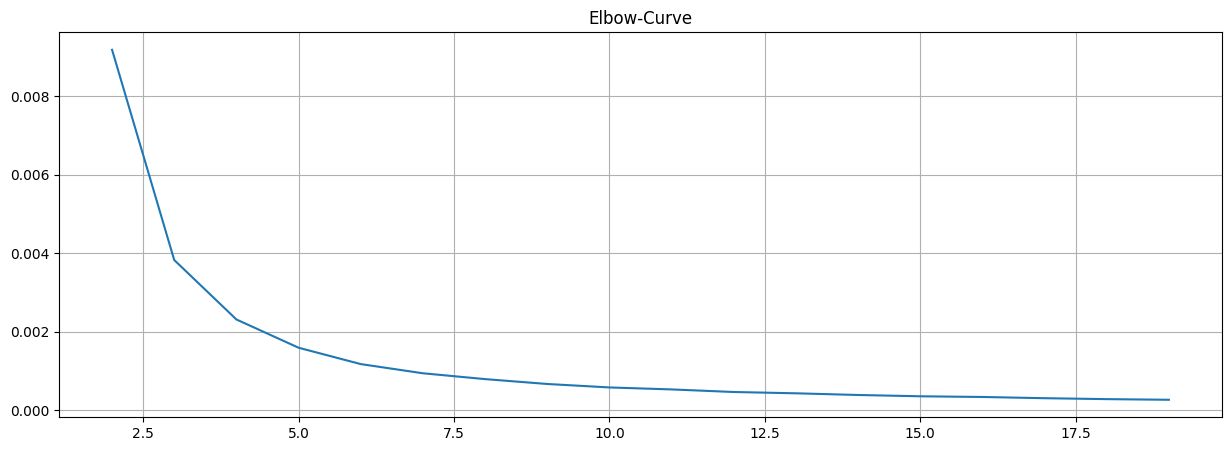

In [12]:
# We will try to find the optimal number of clusters and assign each stock to a specific cluster
# Calculate the average annual percentage return and volatilities over a theoritical one year period

from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

returns = df.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.Volatility = df.pct_change().std()*sqrt(252)

# format the data into numpy array to feed into K-means algorithm
dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

X = dta
distortions =[]
for k in range(2,20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,5))
plt.plot(range(2,20),distortions)
plt.grid(True)
plt.title('Elbow-Curve')
plt.show()

From the above Elbow curve we see that the curve has a steep at cluster no.4 or 5.

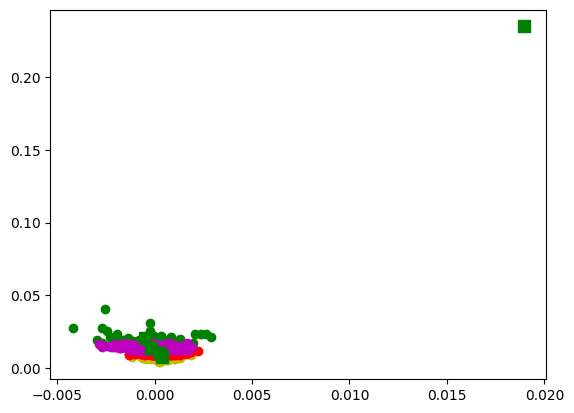

In [13]:
from pylab import plot, show
# Computing kmeans with K =5 (5 clusters)
centroids,_= kmeans(dta, 5)
# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [14]:
#identify the outlier
print(returns.idxmax())

Returns    NYSE.XRX
dtype: object


In [15]:
#There are oulier's in the data in the column NYSE.XRX -> BHF
df = df.drop(columns=['NYSE.XRX'],axis=1)

In [16]:
df.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,34.00,84.370,119.035,44.40,39.88,82.03,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,34.07,84.370,119.035,44.11,39.88,82.03,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,34.11,84.585,119.260,44.09,39.98,82.02,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,33.97,84.460,119.260,44.25,39.99,82.02,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,34.00,84.470,119.610,44.11,39.96,82.03,50.20,63.91,121.695,53.240


In [17]:
returns = df.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.Volatility = df.pct_change().std()*sqrt(252)

# format the data into numpy array to feed into K-means algorithm

#recreate data to feed into the algorithm
dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

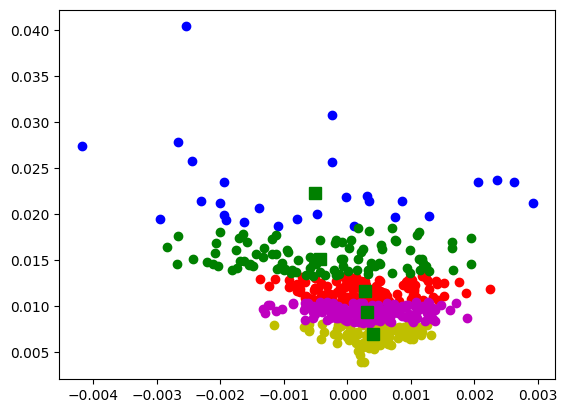

In [18]:
# Computing kmeans with K =5 (5 clusters)
centroids,_= kmeans(dta, 5)
# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

To get the information about the clusters. I have running below code.

In [19]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
details[:5]

[('NASDAQ.AAL', 3),
 ('NASDAQ.AAPL', 4),
 ('NASDAQ.ADBE', 4),
 ('NASDAQ.ADI', 2),
 ('NASDAQ.ADP', 2)]

In [21]:
data = pd.DataFrame(details, columns=['Stock_Name','Cluster_No'])
data.Cluster_No.value_counts()

4    154
2    120
1    103
3     94
0     28
Name: Cluster_No, dtype: int64

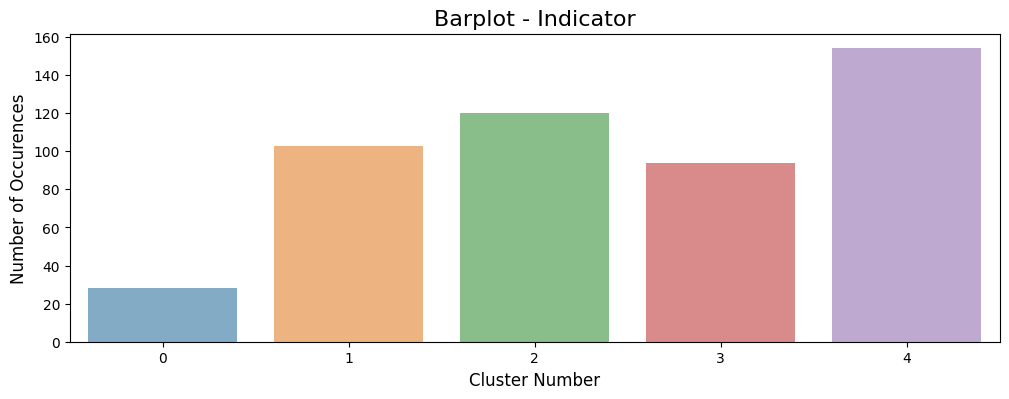

In [22]:
import seaborn as sns
ind = data.Cluster_No.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=ind.index, y=ind.values, alpha=0.6)
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Cluster Number',fontsize=12)
plt.title('Barplot - Indicator',fontsize =16)
plt.show()

Excercise 3:

Identify which all stocks are moving together and which all stocks are different from each other.



In [23]:
df = pd.read_csv('/content/drive/MyDrive/ML_Assignments/data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [24]:
dt = df.copy()
dt.drop(['DATE','SP500'],inplace=True,axis=1)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# convert data into numpy arrays
X = dt.values

# Scaling the values
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=150)
pca.fit(X_scaled)

# the amount of variance that each PCA explains
var = pca.explained_variance_ratio_

# cumulative varince explains
var1 = np.cumsum(np.round(var, decimals=4)*100)
print(var1)

[47.03 64.26 76.28 81.13 84.93 87.74 89.74 91.05 92.1  92.85 93.53 94.11
 94.57 95.02 95.43 95.78 96.11 96.37 96.6  96.82 97.01 97.17 97.32 97.45
 97.58 97.7  97.81 97.91 98.   98.08 98.16 98.24 98.31 98.38 98.44 98.5
 98.56 98.61 98.66 98.71 98.75 98.79 98.83 98.87 98.91 98.94 98.97 99.
 99.03 99.06 99.09 99.12 99.15 99.17 99.19 99.21 99.23 99.25 99.27 99.29
 99.31 99.33 99.35 99.37 99.39 99.41 99.43 99.45 99.46 99.47 99.48 99.49
 99.5  99.51 99.52 99.53 99.54 99.55 99.56 99.57 99.58 99.59 99.6  99.61
 99.62 99.63 99.64 99.65 99.66 99.67 99.68 99.69 99.7  99.71 99.72 99.73
 99.74 99.75 99.76 99.77 99.78 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79]


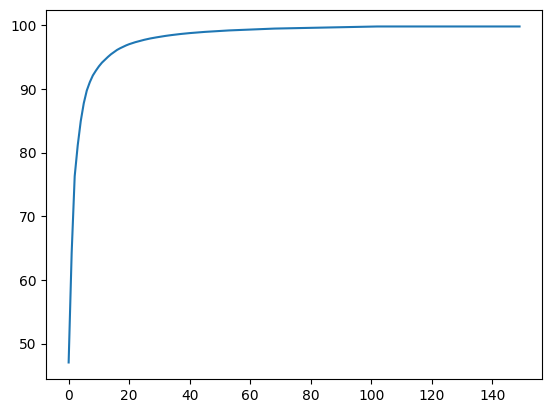

In [25]:
plt.plot(var1)

In [26]:
# Looking at above plot I can consider 25 variables
pca = PCA(n_components =25)
X1 = pca.fit_transform(X_scaled)
print(X1)

[[ 25.55018064  10.00580482  -9.38207446 ...   0.55125122   0.1000052
    2.41781131]
 [ 25.64880185   9.89282687  -9.8023104  ...   0.45233887   0.18379853
    2.31080441]
 [ 25.56345929   9.82533675  -9.67570287 ...   0.52867008   0.05662106
    2.05404564]
 ...
 [-22.76894921  13.32753802   6.56220278 ...  -2.1552608    1.1911358
   -0.31186198]
 [-22.61319638  13.41831515   6.6755356  ...  -2.14088629   1.19731387
   -0.33839309]
 [-22.72127837  13.36292841   6.60406294 ...  -2.17817885   1.17697989
   -0.29819906]]


In [27]:
print('Number of PCA :',len(pca.components_))
print(abs(pca.components_))

Number of PCA : 25
[[0.03925756 0.04106421 0.0629084  ... 0.06247664 0.00253829 0.05169773]
 [0.06428354 0.033861   0.00186129 ... 0.02040637 0.08122924 0.05950068]
 [0.03985758 0.06416494 0.01207933 ... 0.02101011 0.06637293 0.02356977]
 ...
 [0.01154395 0.00534208 0.00473255 ... 0.01184195 0.04444104 0.01197972]
 [0.07431658 0.02156198 0.00906661 ... 0.00126264 0.01828631 0.04834566]
 [0.02135661 0.0332367  0.03693854 ... 0.00438693 0.02078342 0.02522449]]


In [28]:
comp = pd.DataFrame(pca.components_, columns = dt.columns)
comp.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.039258,-0.041064,-0.062908,-0.009788,-0.035866,-0.054668,0.050356,-0.035396,-0.044060,-0.014671,...,-0.049413,0.057001,-0.054623,-0.050608,0.047199,-0.057897,-0.061392,-0.062477,0.002538,-0.051698
1,-0.064284,0.033861,0.001861,-0.032453,0.043511,-0.029519,0.016178,0.058286,-0.052667,0.012376,...,-0.058941,0.030277,0.013643,-0.040769,-0.052795,0.010238,0.031466,-0.020406,-0.081229,-0.059501
2,-0.039858,0.064165,0.012079,0.043266,-0.037239,0.040506,-0.053892,-0.051099,0.030738,-0.086428,...,-0.003223,0.022125,0.059617,-0.034587,-0.028712,-0.039074,-0.004342,0.021010,-0.066373,0.023570
3,0.007578,0.077164,0.008564,-0.027896,-0.017418,0.008973,-0.032239,0.034448,0.051511,-0.077594,...,0.021692,0.060885,-0.039630,0.027694,0.012100,-0.039575,0.002900,-0.002703,-0.049420,0.015160
4,-0.033303,-0.016981,0.002438,-0.038330,-0.102023,-0.034831,-0.011187,0.037595,-0.039683,-0.014357,...,-0.036672,-0.011451,-0.030314,-0.012030,-0.045731,0.029255,-0.003013,-0.001339,-0.003603,0.005364
